Project Planning Stage (Hong To Nhu Trinh)
- 

In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

**1. Data Description**

**players.csv**

- Variable names: experience, hashedEmail, name, gender, played_hours, Age, subscribe
- Number of variables: 7
- Data type:
  - Character (chr): experience, hashedEmail, name, gender
  - Double (dbl): played_hours, Age
  - Logical (lgl): subscribe
- Type of variable:
  - Numeric: played_hours, Age
  - Categorical: experience, gender, subscribe
- Mean after removing NA observation (displayed in mean_table below in part 3): 
  - played_hours: 5.90 (h)
  - Age: 21.14 (years old)
- Number of observations: 196
- Data issue:
  - We also need to change the names of the variables "Age" and "hashedEmail" to "age" and "hashed_email" to make all variables in the same format.
  - The variables "hashedEmail" and "name" are not useful for modeling, so they should be removed before modeling to make the data tidy
  - Categorical variables may not be converted into factors, so we need to convert all these variables to factors to make sure the prediction model can run smoothly.
- Potential issue:
    - There might be NA values, so we need to check and remove them before modeling.
    - Standardize the numeric data before applying the prediction model.

**sessions.csv**
- Variable names: hashedEmail, start_time, end_time, original_start_time, original_end_time 
- Number of variables: 5
- Data type:
  - Character (chr): hashedEmail, start_time, end_time
  - Double (dbl): original_start_time, original_end_time
- Variable type:
  - Numeric: original_start_time, original_end_time
- Number of observations: 1535
- Data issue:
  - Variables are not in the same format. Therefore, we need to change the name of the variable "hashedEmail" to "hashed_email" to make all variables in the same format.
  - The variables "hashedEmail" and "name" are not useful for modeling, so they should be removed before modeling to make the data tidy
  - Remove the date in the columns start_time, end_time to keep the start and end time only.
- Potential issues:
  - There might be NA values, so we need to check and remove them before modeling.

**2. Questions**

**Question 1:** What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

**Specific question:** Can played hours predict if players subscribe or not in player.csv?

Wrangle planning for players.csv:  
  - Rename column Age to age, hashedEmail to hashed_email to make the names of variables in the same format.
  - Remove columns which is not used: hashed_email, name
  - Remove observations that have NA values to tidy the data.
  - Convert categorical variables (subscribe, gender, experience) into factors to apply the prediction model.

Describe clearly how the data will help you address the question of interest
- To solve the question of interest, I use the dataset player.csv, which contains variables such as gender, experience, age, and playing hours. By analyzing the data using exploratory statistics (correlations) and a predictive KNN classification model, we can determine which player features are most strongly associated with newsletter subscription and thus indicate which characteristic is most predictive. Moreover, by grouping players by their experience, we can compare how the influence of these features differs across player types — for example, whether experienced players’ subscription behaviour depends more on playtime or age. 

**3. Exploratory Data Analysis and Visualization**

- Load the data set into R

In [12]:
#code
player <- read_csv("/home/jovyan/work/Individual-Planning-Stage-Hong-To-Nhu-Trinh/players.csv")
player
session <- read_csv("/home/jovyan/work/Individual-Planning-Stage-Hong-To-Nhu-Trinh/sessions.csv") 
session

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


- Wrangling and tidying the data set done in individual stage:
  - Rename column Age to age, hashedEmail to hashed_email in order to make the columns' names in the same format.
  - Remove columns which is not used: hashed_email, name
  - Remove NA value in each column to tidy the data.
- Additional Wrangling done in group stage:
  - Convert categorical variables (subscribe, gender, experience) into factors
  - Scale and center numerical variables (age and played_hours)
  - Group by experience

In [14]:
 player_tidy <- player |>
    rename(
        hashed_email = hashedEmail,
        age = Age) |>
    select(-hashed_email, -name) |>
    drop_na() 
player_tidy

experience,subscribe,played_hours,gender,age
<chr>,<lgl>,<dbl>,<chr>,<dbl>
Pro,TRUE,30.3,Male,9
Veteran,TRUE,3.8,Male,17
Veteran,FALSE,0.0,Male,17
⋮,⋮,⋮,⋮,⋮
Veteran,FALSE,0.3,Male,22
Amateur,FALSE,0.0,Prefer not to say,57
Amateur,FALSE,2.3,Male,17


- Compute the mean value for each quantitative variable in the players.csv data set. Report the mean values in a table format.

In [16]:
mean_table <- player_tidy |>
  summarise(
    mean_age = round(mean(age),2),
    mean_played_hours = round(mean(played_hours),2))
mean_table

mean_age,mean_played_hours
<dbl>,<dbl>
21.14,5.9


- Make a few exploratory visualizations of the data.
  - From the graph **Played hours by subscription** below, the histogram shows that the majority of players have low played hours, under 50 hours. The proportion of subscribers in this group is 75%. However, for those who play longer, over 50 hours, subscription rates are significantly higher, nearly 100%. In summary, subscribers appear more frequently in higher-hour bins, while non-subscribers are almost entirely within the lowest playtime range. This suggests that playtime behaviour is associated with subscription tendency — players who engage more deeply with the game are more likely to subscribe. Therefore, the variable played hours is likely a useful predictor in modelling subscription behaviour, which is the answer to my specific question: Can played hours predict if players subscribe or not in player.csv?

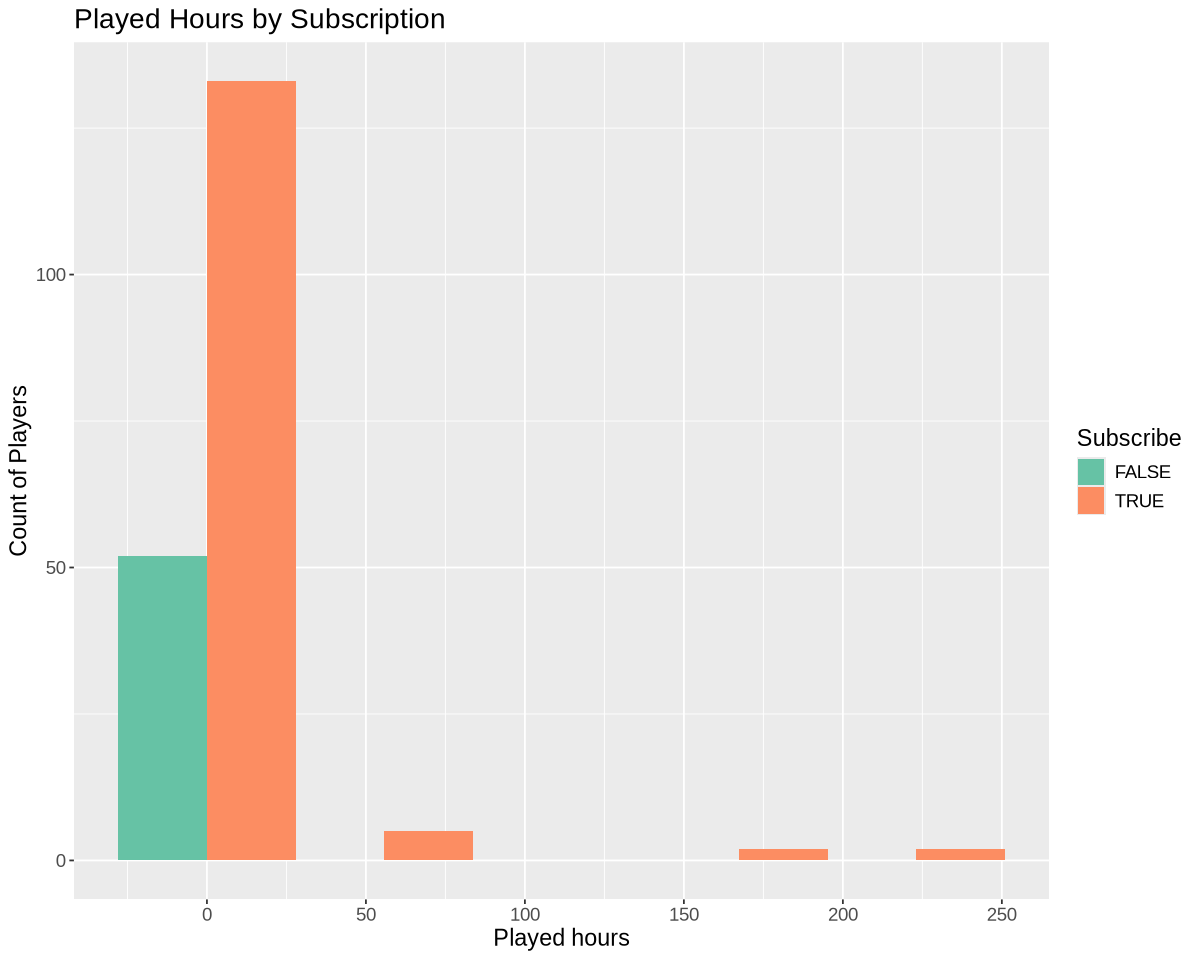

In [116]:
options(repr.plot.width = 10, repr.plot.height = 8)
ggplot(player_tidy, aes(x = played_hours, fill = subscribe)) +
geom_histogram(position = "dodge", bins=5) +
labs(title = "Played Hours by Subscription",
       x = "Played hours", y = "Count of Players", fill = "Subscribe") +
theme(text = element_text(size=14)) + scale_fill_brewer(palette = 'Set2')

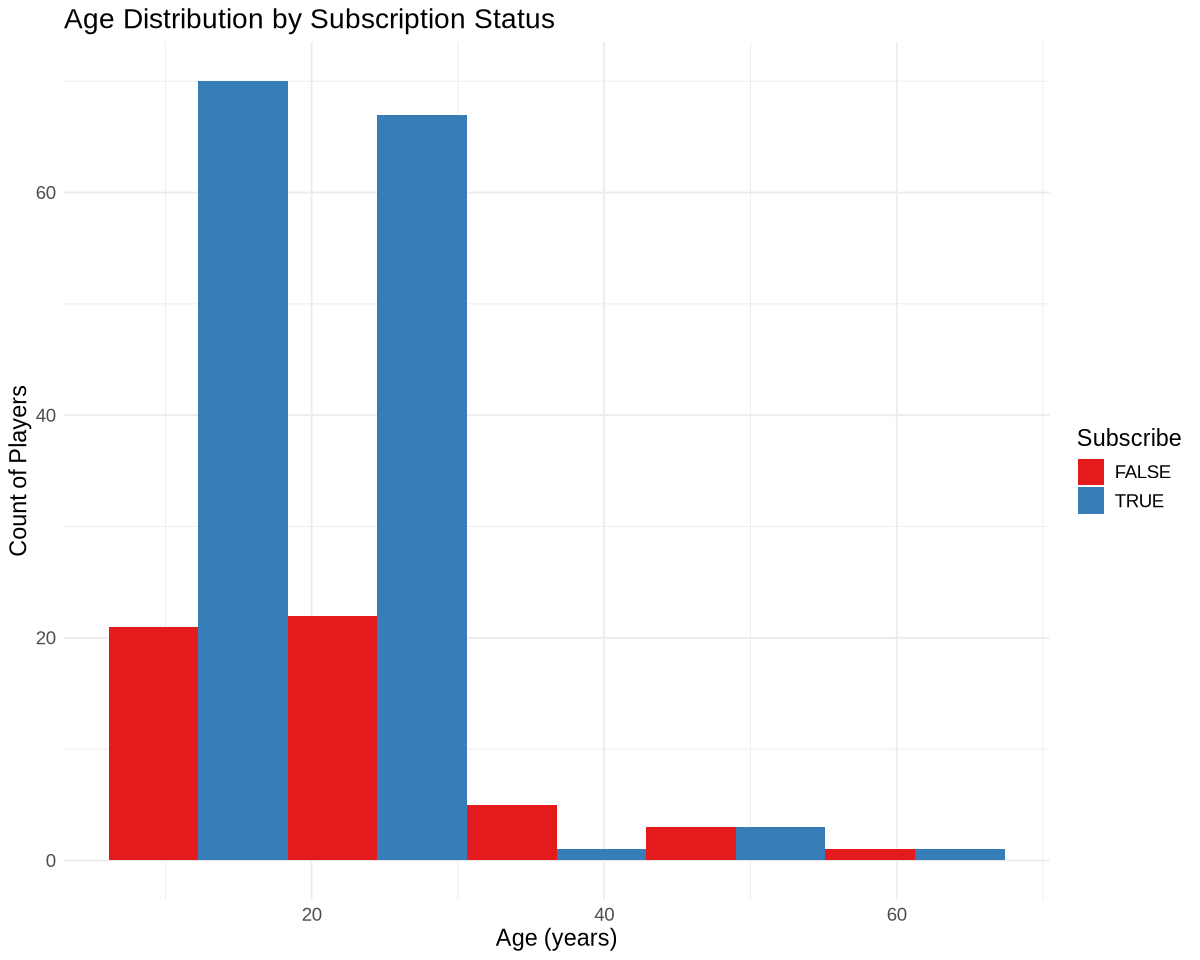

In [17]:
options(repr.plot.width = 10, repr.plot.height = 8)
ggplot(player_tidy, aes(x = age, fill = subscribe)) +
  geom_histogram(position = "dodge", bins = 5) +
  labs(title = "Age Distribution by Subscription Status",
       x = "Age (years)", y = "Count of Players", fill = "Subscribe") +
  theme_minimal() +theme(text = element_text(size=14)) + scale_fill_brewer(palette = 'Set1')

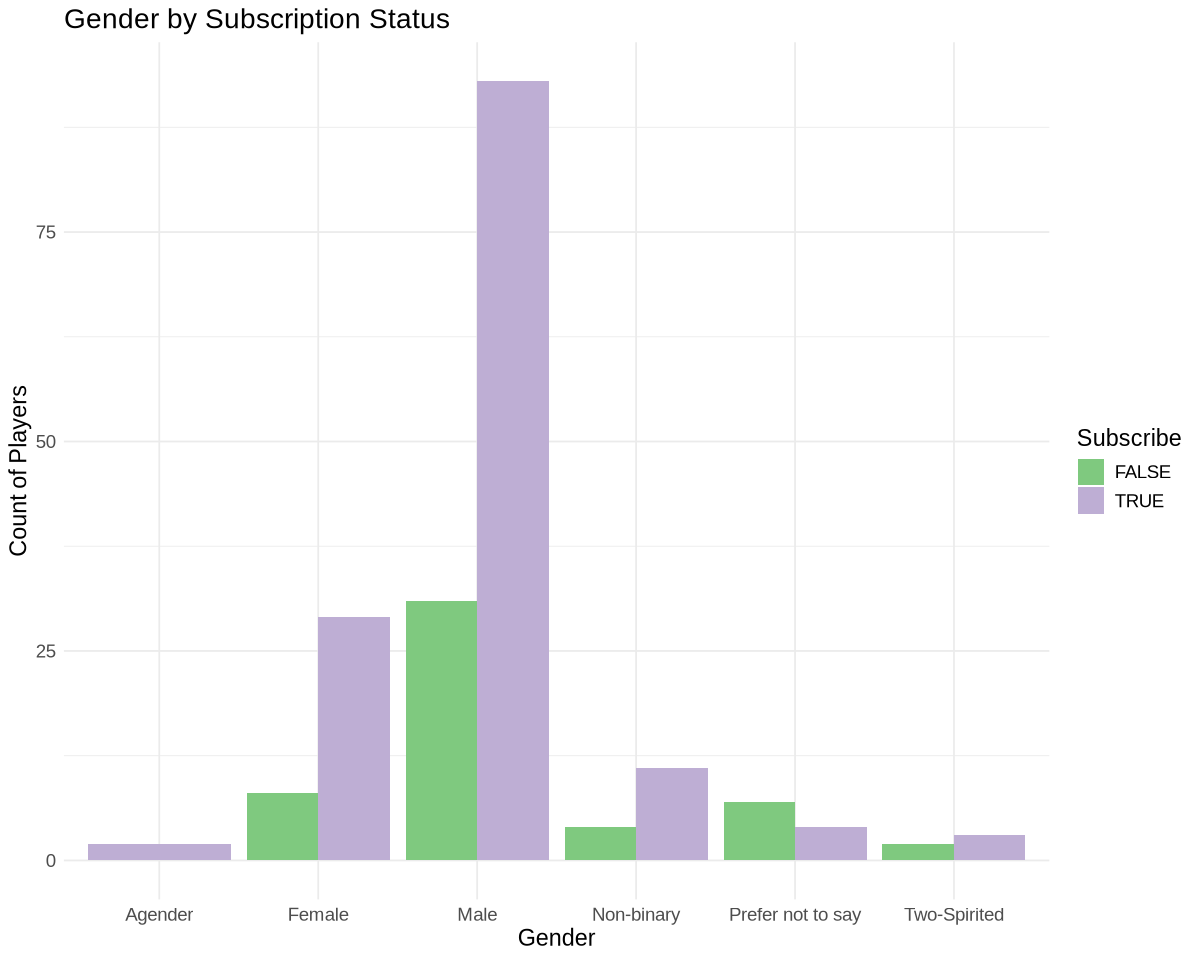

In [112]:
options(repr.plot.width = 10, repr.plot.height = 8)
ggplot(player_tidy, aes(x = gender, fill = subscribe)) +
  geom_bar(position = "dodge") +
  labs(title = "Gender by Subscription Status",
       x = "Gender", y = "Count of Players", fill = "Subscribe") +
  theme_minimal() + theme(text = element_text(size=14)) + scale_fill_brewer(palette = 'Accent')

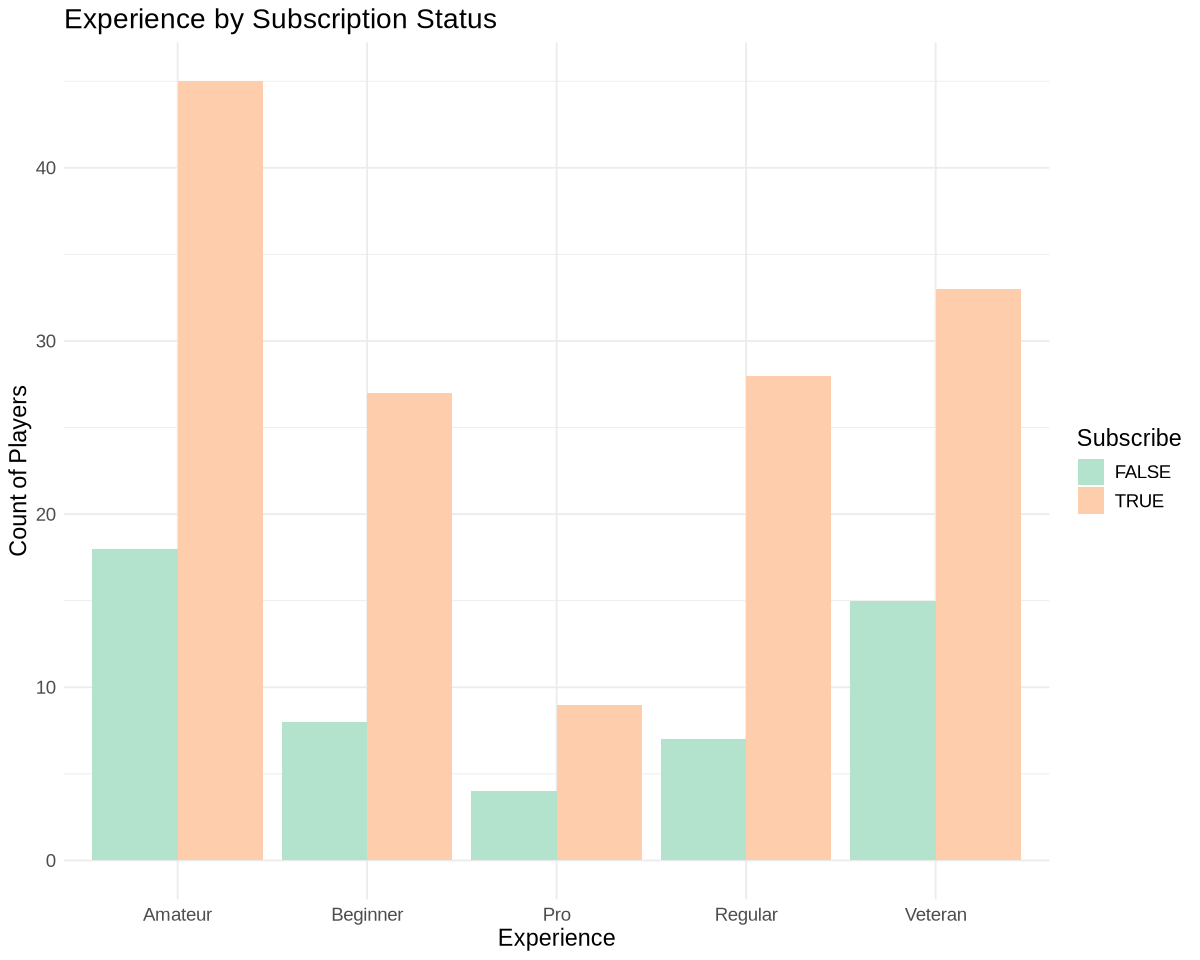

In [113]:
options(repr.plot.width = 10, repr.plot.height = 8)
ggplot(player_tidy, aes(x = experience, fill = subscribe)) +
  geom_bar(position = "dodge") +
  labs(title = "Experience by Subscription Status",
       x = "Experience", y = "Count of Players", fill = "Subscribe") +
  theme_minimal() + theme(text = element_text(size=14)) + scale_fill_brewer(palette = 'Pastel2')

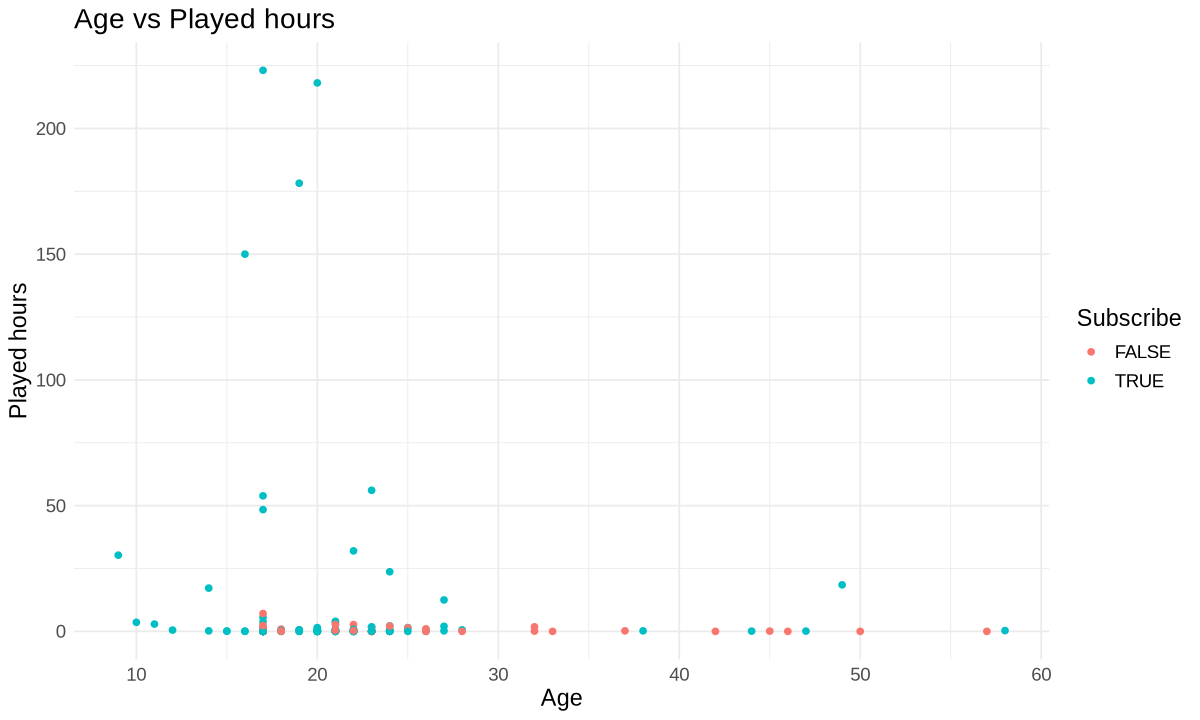

In [114]:
options(repr.plot.width = 10, repr.plot.height = 6)
ggplot(player_tidy, aes(x = age, y= played_hours, color = subscribe)) +
  geom_point() +
  labs(title = "Age vs Played hours ",
       x = "Age", y = "Played hours", color = "Subscribe") +
  theme_minimal() + theme(text = element_text(size=14))

**4. Methods and Plan**

Propose one method to address your question of interest using the selected dataset and explain why it was chosen. Do not perform any modelling or present results at this stage. We are looking for high-level planning regarding model choice and justifying that choice.

What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

- I suggest using KNN classification with the response variable being “subscribe”, and explanatory variables (predictors) being “experience”, “age”, “played hours”, and “gender”. The reason for this is that our response variable, “subscribe”, is classified as true or false, which is favorable for KNN classification because "subscribe" can be treated as categorical value.
Compared to regression models, which are usually used to predict numerical values, KNN classification could produce better prediction. 
- To see how these features (predictors) differ between different various type, I apply the same method to see how the prediction will be for the response variable and only each of  explanatory variable. From the result of error prediction, the explanatory with the lowest value is the most predictive variable. 


**5.GitHub Repository**"

Git hub link: https://github.com/nancytrinh/Individual-Planning-Stage-Hong-To-Nhu-Trinh.git